<a href="https://colab.research.google.com/github/DanielRaiicHu/telecom_x_2/blob/main/telecom_x_2.ipynb?forceRefresh=true">
  <img src="https://drive.google.com/uc?export=view&id=191Woxwut0iaIL2hCcCIeXRSB6oba_88H" alt="Abrir en Colab" width="120"/>
</a>

# **Proyecto: Telecom X - Parte 2**

## **Preparación de los Datos**

### **Extracción del Archivo Tratado**

Se importan y tratan los datos generados en el desafío anterior

In [164]:
import pandas as pd
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
# Ignoramos mensajes de advertencia para mantener la salida limpia
warnings.filterwarnings('ignore')

In [83]:
url = 'https://raw.githubusercontent.com/DanielRaiicHu/telecom_x_2/main/datos_tratados.csv'
datos = pd.read_csv(url)
datos.head()

,ID_Cliente,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
0,0002-ORFBO,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Un año,Sí,Cheque por correo,2.19,65.6,593.30
1,0003-MKNFE,No,Masculino,No,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Cheque por correo,2.00,59.9,542.40
2,0004-TLHLJ,Sí,Masculino,No,No,No,4,Sí,No,Fibra óptica,...,Sí,No,No,No,Mensual,Sí,Cheque electrónico,2.46,73.9,280.85
3,0011-IGKFF,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fibra óptica,...,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,3.27,98.0,1237.85
4,0013-EXCHZ,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fibra óptica,...,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,2.80,83.9,267.40


In [84]:
datos.shape

(7043, 22)

In [85]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Cliente             7043 non-null   object 
 1   Evasion                7043 non-null   object 
 2   Genero                 7043 non-null   object 
 3   AdultoMayor            7043 non-null   object 
 4   TienePareja            7043 non-null   object 
 5   Dependientes           7043 non-null   object 
 6   MesesAntiguedad        7043 non-null   int64  
 7   ServicioTelefonico     7043 non-null   object 
 8   LineasMultiples        7043 non-null   object 
 9   ServicioInternet       7043 non-null   object 
 10  SeguridadEnLinea       7043 non-null   object 
 11  RespaldoEnLinea        7043 non-null   object 
 12  ProteccionDispositivo  7043 non-null   object 
 13  SoporteTecnico         7043 non-null   object 
 14  StreamingTV            7043 non-null   object 
 15  Stre

In [86]:
datos.describe()

,MesesAntiguedad,CuentasDiarias,CargoMensual,CargoTotal
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,2.158675,64.761692,2279.734304
std,24.559481,1.003088,30.090047,2266.794470
min,0.000000,0.610000,18.250000,0.000000
25%,9.000000,1.180000,35.500000,398.550000
50%,29.000000,2.340000,70.350000,1394.550000
75%,55.000000,2.990000,89.850000,3786.600000
max,72.000000,3.960000,118.750000,8684.800000


In [87]:
datos.describe(include = 'O')

,ID_Cliente,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadEnLinea,RespaldoEnLinea,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Masculino,No,No,No,Sí,No,Fibra óptica,No,No,No,No,No,No,Mensual,Sí,Cheque electrónico
freq,1,5174,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [88]:
# Revisión de datos únicos para cada columna
for col in datos.columns:
    if datos[col].dtype == 'object':
        print(f"Valores únicos en '{col}':")
        print(datos[col].unique())
        print("—" * 40)

Valores únicos en 'ID_Cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
————————————————————————————————————————
Valores únicos en 'Evasion':
['No' 'Sí']
————————————————————————————————————————
Valores únicos en 'Genero':
['Femenino' 'Masculino']
————————————————————————————————————————
Valores únicos en 'AdultoMayor':
['No' 'Sí']
————————————————————————————————————————
Valores únicos en 'TienePareja':
['Sí' 'No']
————————————————————————————————————————
Valores únicos en 'Dependientes':
['Sí' 'No']
————————————————————————————————————————
Valores únicos en 'ServicioTelefonico':
['Sí' 'No']
————————————————————————————————————————
Valores únicos en 'LineasMultiples':
['No' 'Sí' 'Sin servicio telefónico']
————————————————————————————————————————
Valores únicos en 'ServicioInternet':
['DSL' 'Fibra óptica' 'No']
————————————————————————————————————————
Valores únicos en 'SeguridadEnLinea':
['No' 'Sí' 'Sin servicio de internet']
——————————————

### **Eliminación de columnas irrelevantes**

In [91]:
datos = datos.drop('ID_Cliente', axis=1)
datos.head()

,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadEnLinea,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
0,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,No,...,No,Sí,Sí,No,Un año,Sí,Cheque por correo,2.19,65.6,593.30
1,No,Masculino,No,No,No,9,Sí,Sí,DSL,No,...,No,No,No,Sí,Mensual,No,Cheque por correo,2.00,59.9,542.40
2,Sí,Masculino,No,No,No,4,Sí,No,Fibra óptica,No,...,Sí,No,No,No,Mensual,Sí,Cheque electrónico,2.46,73.9,280.85
3,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fibra óptica,No,...,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,3.27,98.0,1237.85
4,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fibra óptica,No,...,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,2.80,83.9,267.40


### **Tratamiento de los datos binarios**

In [93]:
datos_codificados = datos.copy()

# Columnas con Sí/No
columnas_sin_no = ['Evasion','AdultoMayor','TienePareja','Dependientes','ServicioTelefonico','FacturaElectronica']

# Transformación a las variables de las variables con Sí/No. 'Sí' = 1 y 'No' = 0
datos_codificados[columnas_sin_no] = datos_codificados[columnas_sin_no].replace({'Sí':1, 'No':0})

# Transformación de la variable Genero
datos_codificados.Genero = datos_codificados.Genero.replace({'Femenino':0,'Masculino':1})

In [94]:
datos_codificados

,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadEnLinea,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
0,0,0,0,1,1,9,1,No,DSL,No,...,No,Sí,Sí,No,Un año,1,Cheque por correo,2.19,65.60,593.30
1,0,1,0,0,0,9,1,Sí,DSL,No,...,No,No,No,Sí,Mensual,0,Cheque por correo,2.00,59.90,542.40
2,1,1,0,0,0,4,1,No,Fibra óptica,No,...,Sí,No,No,No,Mensual,1,Cheque electrónico,2.46,73.90,280.85
3,1,1,1,1,0,13,1,No,Fibra óptica,No,...,Sí,No,Sí,Sí,Mensual,1,Cheque electrónico,3.27,98.00,1237.85
4,1,0,1,1,0,3,1,No,Fibra óptica,No,...,No,Sí,Sí,No,Mensual,1,Cheque por correo,2.80,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,0,13,1,No,DSL,Sí,...,No,Sí,No,No,Un año,0,Cheque por correo,1.84,55.15,742.90
7039,1,1,0,1,0,22,1,Sí,Fibra óptica,No,...,No,No,No,Sí,Mensual,1,Cheque electrónico,2.84,85.10,1873.70
7040,0,1,0,0,0,2,1,No,DSL,No,...,No,No,No,No,Mensual,1,Cheque por correo,1.68,50.30,92.75
7041,0,1,0,1,1,67,1,No,DSL,Sí,...,Sí,Sí,No,Sí,Dos años,0,Cheque por correo,2.26,67.85,4627.65


In [95]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Evasion                7043 non-null   int64  
 1   Genero                 7043 non-null   int64  
 2   AdultoMayor            7043 non-null   int64  
 3   TienePareja            7043 non-null   int64  
 4   Dependientes           7043 non-null   int64  
 5   MesesAntiguedad        7043 non-null   int64  
 6   ServicioTelefonico     7043 non-null   int64  
 7   LineasMultiples        7043 non-null   object 
 8   ServicioInternet       7043 non-null   object 
 9   SeguridadEnLinea       7043 non-null   object 
 10  RespaldoEnLinea        7043 non-null   object 
 11  ProteccionDispositivo  7043 non-null   object 
 12  SoporteTecnico         7043 non-null   object 
 13  StreamingTV            7043 non-null   object 
 14  StreamingPeliculas     7043 non-null   object 
 15  Tipo

In [96]:
# Las variables que siguen siendo tipo objecty las almacena en categoricas_restantes
categoricas_restantes =  datos_codificados.select_dtypes(include='object').columns.tolist()

In [97]:
datos_codificados = pd.get_dummies(data = datos_codificados, columns=(categoricas_restantes), drop_first=True, dtype=int)

In [98]:
# Para mantener el orden original de mi dataframe
datos_codificados = datos_codificados.reindex(
    columns=sum(
        [
            ([c] if c not in categoricas_restantes else
             [col for col in datos_codificados.columns if col.startswith(f"{c}_")])
            for c in datos.columns
        ],[]
               )
            )

In [99]:
datos_codificados.head()

,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples_Sin servicio telefónico,LineasMultiples_Sí,ServicioInternet_Fibra óptica,...,StreamingPeliculas_Sí,TipoContrato_Mensual,TipoContrato_Un año,FacturaElectronica,MetodoPago_Cheque por correo,MetodoPago_Tarjeta de crédito (automático),MetodoPago_Transferencia bancaria (automática),CuentasDiarias,CargoMensual,CargoTotal
0,0,0,0,1,1,9,1,0,0,0,...,0,0,1,1,1,0,0,2.19,65.6,593.30
1,0,1,0,0,0,9,1,0,1,0,...,1,1,0,0,1,0,0,2.00,59.9,542.40
2,1,1,0,0,0,4,1,0,0,1,...,0,1,0,1,0,0,0,2.46,73.9,280.85
3,1,1,1,1,0,13,1,0,0,1,...,1,1,0,1,0,0,0,3.27,98.0,1237.85
4,1,0,1,1,0,3,1,0,0,1,...,0,1,0,1,1,0,0,2.80,83.9,267.40


In [100]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Evasion                                         7043 non-null   int64  
 1   Genero                                          7043 non-null   int64  
 2   AdultoMayor                                     7043 non-null   int64  
 3   TienePareja                                     7043 non-null   int64  
 4   Dependientes                                    7043 non-null   int64  
 5   MesesAntiguedad                                 7043 non-null   int64  
 6   ServicioTelefonico                              7043 non-null   int64  
 7   LineasMultiples_Sin servicio telefónico         7043 non-null   int64  
 8   LineasMultiples_Sí                              7043 non-null   int64  
 9   ServicioInternet_Fibra óptica            

### **Verificación de la proporción**

Visualización gráfica de clientes que evaden (Sí) vs clientes que permanecen (No)

In [151]:
cantidad_evasion = datos_codificados.Evasion.value_counts()
proporcion_evasion = datos_codificados['Evasion'].value_counts(normalize=True).sort_index()

print(f'De un total de {datos_codificados["Evasion"].size} clientes.')
print(f'Los clientes que evaden son: {cantidad_evasion[1].sum()}, equivalentes al {proporcion_evasion[1]:.2%}')
print(f'Los clientes que permanecen son: {cantidad_evasion[0].sum()}, equivalentes al {proporcion_evasion[0]:.2%}')

De un total de 7043
Los clientes que evaden son: 1869, equivalentes al 26.54%
Los clientes que permanecen son: 5174, equivalentes al 73.46%


In [90]:
px.histogram(datos, x='Evasion', text_auto=True, color='Evasion') #plotly.express

---
>* **Se observa una diferencia significativa entre la cantidad de clientes que permanecen y aquellos que abandonan el servicio. Aunque la mayoría de los clientes se mantiene, el porcentaje de evasión alcanza un 26.54%, lo cual representa una proporción bastante considerable.**

---

### **Separación de Variables Explicativas y Respuesta**

In [160]:
from sklearn.model_selection import train_test_split

# Variables Explicativas
X = datos_codificados.drop('Evasion', axis=1)

# Variable Respuesta
y = datos_codificados['Evasion']

# División inicial entre conjunto general y conjunto de prueba (30% para prueba)
X, X_test,y,y_test = train_test_split(X,y,test_size= 0.3, stratify = y, random_state = 5)

# División secundaria: entrenamiento vs validación
X_train, X_val,y_train,y_val = train_test_split(X,y, stratify = y, random_state = 5)

In [161]:
X.head()

,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples_Sin servicio telefónico,LineasMultiples_Sí,ServicioInternet_Fibra óptica,ServicioInternet_No,...,StreamingPeliculas_Sí,TipoContrato_Mensual,TipoContrato_Un año,FacturaElectronica,MetodoPago_Cheque por correo,MetodoPago_Tarjeta de crédito (automático),MetodoPago_Transferencia bancaria (automática),CuentasDiarias,CargoMensual,CargoTotal
6002,0,0,1,0,57,1,0,1,1,0,...,1,1,0,1,0,0,0,3.32,99.65,5497.05
2870,1,0,1,0,55,1,0,1,1,0,...,1,0,1,1,0,0,0,3.47,104.15,5743.05
1340,0,1,1,0,48,1,0,0,1,0,...,0,1,0,1,0,0,1,2.36,70.65,3545.05
1510,1,0,0,0,8,1,0,0,0,0,...,0,1,0,1,1,0,0,1.50,45.15,438.40
4437,1,0,1,0,71,1,0,1,1,0,...,1,0,0,1,0,1,0,3.47,104.15,7365.30


In [162]:
y.head()

,Evasion
6002,0
2870,1
1340,0
1510,1
4437,0


ver: https://github.com/DanielRaiicHu/clasificacion_validacion_y_metricas/blob/main/Clasificacion_validacion_y_metricas.ipynb

In [214]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar el modelo
# Con delimitación en el Árbol de Decisión
modelo = DecisionTreeClassifier(max_depth=10) # Límite de profundidad
modelo.fit(X_train,y_train)                   # Vuelve a entrenar
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.8896402488504193
La exactitud del modelo con el conjunto de validación es de: 0.7737226277372263


In [237]:
from sklearn.metrics import confusion_matrix

y_previsto = modelo.predict(X_val)

# Creamos la matriz de confusión, que muestra cómo se desempeñó el modelo al clasificar:
# - Verdaderos negativos (TN): clientes que permanecen bien clasificados como que permanecen (0)
# - Falsos positivos (FP): clientes que permanecen mal clasificados como que evaden (1)
# - Falsos negativos (FN): evasores mal clasificados como que permanecen (0)
# - Verdaderos positivos (TP): evasores bien clasificados como que evaden (1)

matriz_confusion = confusion_matrix(y_val,y_previsto)

# Imprimimos la matriz de confusión en forma de array 2x2
print(matriz_confusion)
print('\n')
print(f'Verdaderos Negativos: [{(matriz_confusion)[0,0]}]\nFalsos Positivos    : [{(matriz_confusion)[0,1]}]')
print(f'Falsos Negativos    : [{(matriz_confusion)[1,0]}]\nVerdaderos Positivos: [{(matriz_confusion)[1,1]}]')


[[758 148]
 [131 196]]


Verdaderos Negativos: [758]
Falsos Positivos    : [148]
Falsos Negativos    : [131]
Verdaderos Positivos: [196]


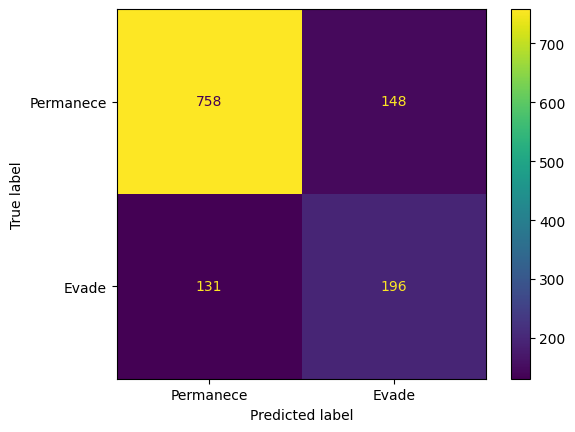

In [216]:
from sklearn.metrics import ConfusionMatrixDisplay

visualizacion = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion,
    display_labels=['Permanece', 'Evade']  # Etiquetas para las clases 0 y 1
)

visualizacion.plot();

In [218]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [219]:
# Calculos iniciales

# Calcula la PRECISIÓN (precision)
# Fórmula: TP / (TP + FP)
# ¿De todos los casos que predije como morosos, cuántos realmente lo eran?
print(f'La precisión del modelo de árbol es: {precision_score(y_val, y_previsto)}')

# Calcula la SENSIBILIDAD o RECALL
# Fórmula: TP / (TP + FN)
# ¿De todos los verdaderos morosos, cuántos logré identificar correctamente?
print(f'La sensibilidad (recall) del modelo de árbol es: {recall_score(y_val, y_previsto)}')

# Calcula la EXACTITUD (accuracy)
# Fórmula: (TP + TN) / (TP + TN + FP + FN)
# ¿Qué proporción total de predicciones fueron correctas?
print(f'La exactitud (accuracy) del modelo de árbol es: {accuracy_score(y_val, y_previsto)}')

# Calcula el F1-SCORE
# Fórmula: 2 * (precision * recall) / (precision + recall)
# Es el promedio armónico entre precisión y recall. Penaliza fuertemente los valores bajos.
print(f'El F1-Score del modelo de árbol es: {f1_score(y_val, y_previsto)}')

La precisión del modelo de árbol es: 0.5697674418604651
La sensibilidad (recall) del modelo de árbol es: 0.599388379204893
La exactitud (accuracy) del modelo de árbol es: 0.7737226277372263
El F1-Score del modelo de árbol es: 0.5842026825633383
